# Data wrangling

*   Modulos
*   Crear una serie
*   Carga de datos
*   Resumen de los datos: dimensiones y estructuras
*   Detección y tratamiento de valores ausentes
*   Variables dummy
*   Ordenar el dataframe
*   filtrar por columna o fila
*   Query con pandas
* Joins

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mainpath = "https://raw.githubusercontent.com/elprincipitogauss/lesson/main/"
filename = "Salary_Dataset_with_Extra_Features.csv"
fullpath = os.path.join(mainpath, filename)
df_000 = pd.read_csv(fullpath)
df = df_000.copy()

# Visualizar dataframe

In [ ]:
display(df)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [ ]:
df.head(10)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
5,4.2,Freelancer,Android Developer,100000,3,Bangalore,Full Time,Android
6,3.7,SQUARE N CUBE,Android Developer,192000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
8,3.7,DXMinds Technologies,Android Developer,300000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android


* Información sobre las dimensiones y tipo de variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


## Subconjuntos

* construir un subconjunto de filas a través de su posición

In [ ]:
df.iloc[0:1,]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android


In [ ]:
df.iloc[0:2,1:3]

,Company Name,Job Title
0,Sasken,Android Developer
1,Advanced Millennium Technologies,Android Developer


In [ ]:
df[['Job Title', 'Salary']]

,Job Title,Salary
0,Android Developer,400000
1,Android Developer,400000
2,Android Developer,1000000
3,Android Developer,300000
4,Android Developer,600000
...,...,...
22765,Web Developer,200000
22766,Web Developer,300000
22767,Full Stack Web Developer,192000
22768,Full Stack Web Developer,300000


In [ ]:
df.select_dtypes(['float64' , 'int64']).columns

Index(['Rating', 'Salary', 'Salaries Reported'], dtype='object')

In [ ]:
df[df['Salary']>300000]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
7,3.1,Samsung R&D Institute India - Bangalore,Android Developer,400000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22752,3.7,SwervePoint,Web Developer,600000,1,Bangalore,Full Time,Web
22753,4.3,rtCamp,Web Developer,700000,1,Bangalore,Full Time,Web
22758,4.5,Blu Ocean Innovations,Web Developer - Intern,408000,1,Bangalore,Intern,Web
22763,4.4,Unicon Systems,Web Developer,500000,1,Bangalore,Full Time,Web


In [ ]:
df[df.Salary>500000]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
9,3.6,Endeavour Software Technologies,Android Developer,600000,3,Bangalore,Full Time,Android
12,3.7,Wibmo,Android Developer,900000,2,Bangalore,Full Time,Android
14,3.9,Bookmyshow,Android Developer,600000,2,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22728,3.9,YMedia,Web Developer,800000,1,Bangalore,Full Time,Web
22743,4.0,Nones,Web Developer,576000,1,Bangalore,Full Time,Web
22748,4.2,Full Time Soluções em Serviços Financeiros,Web Developer,1176000,1,Bangalore,Full Time,Web
22752,3.7,SwervePoint,Web Developer,600000,1,Bangalore,Full Time,Web


In [ ]:
df[df["Salaries Reported"].isin([4,5,6,7])]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
594,4.1,Accenture,Senior Android Developer,700000,5,Bangalore,Full Time,Android
595,3.8,3Embed Software Technologies,Senior Android Developer,360000,4,Bangalore,Full Time,Android
1139,4.2,Contus,Senior Android Developer,720000,4,Chennai,Full Time,Android
1584,3.8,Mobisoft Labs,Android Developer,312000,4,New Delhi,Full Time,Android
1585,3.6,Tech Mahindra,Android Developer,300000,4,New Delhi,Full Time,Android
...,...,...,...,...,...,...,...,...
21798,3.3,Webhelp,Web Developer,96000,4,Bangalore,Full Time,Web
21799,3.9,Oracle,Web Developer,200000,4,Bangalore,Full Time,Web
21800,3.3,Octact Solutions,Web Developer,120000,4,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [ ]:
df[(df.Salary>1500000) & (df["Salaries Reported"].isin([8,9]))]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
12528,4.1,Swiggy,Software Development Engineer I,1800000,8,Bangalore,Full Time,SDE
12684,4.4,ShareChat,Software Development Engineer (SDE),1800000,8,Bangalore,Full Time,SDE
12754,3.5,Trilogy Innovations,Software Development Engineer (SDE),2400000,9,Bangalore,Full Time,SDE
12776,4.5,ZestMoney,Software Development Engineer (SDE) II,1600000,9,Bangalore,Full Time,SDE
12777,3.7,Groupon,Software Development Engineer (SDE) II,2000000,8,Bangalore,Full Time,SDE
12797,3.3,Walmart,Software Development Engineer III,2200000,9,Bangalore,Full Time,SDE
12800,4.0,Zeta Suite,Software Development Engineer (SDE) II,1700000,8,Bangalore,Full Time,SDE
12813,3.3,Ola,Software Development Engineer-II,2300000,8,Bangalore,Full Time,SDE
12928,4.1,Swiggy,Software Development Engineer (SDE) II,2600000,8,Bangalore,Full Time,SDE
12953,4.0,Tesco Bengaluru,Software Development Engineer (SDE) II,2300000,9,Bangalore,Full Time,SDE


## Eliminar valores omitidos

In [ ]:
df.dropna(subset=["Rating"], axis=0, inplace=False)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


## Limpieza de texto

* lower: Poner en minúscula todo el texto.
* replace: Remplazar ciertos valores por otros.
* strip: Eliminar los espacios al principio y al final de la cadena.
* title: Poner primera letra de cada palabra en mayúscula.

In [ ]:
txt = ' canción 9  '
txt.lower()

' canción 9  '

In [ ]:
txt = ' canción 9  '
txt.upper()

' CANCIÓN 9  '

In [ ]:
txt = ' canción 9  '
txt.replace("c","k")

' kankión 9  '

In [ ]:
txt = ' canción 9  '
txt.strip()

'canción 9'

In [ ]:
txt = ' canción 9  '
txt.title()

' Canción 9  '

In [ ]:
df["Company Name 2nd"] = (df["Company Name"]
                            .str.upper()
                            .str.replace("S","XXX")
                            .str.strip()
                            .str.title()
                           ) 
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Company Name 2nd
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,Xxxaxxxken
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,Advanced Millennium Technologiexxx
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,Unacademy
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,Xxxnapbizz Cloudtech
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,Appoidxxx Tech Xxxolutionxxx
...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,Expert Xxxolutionxxx
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,Nextgen Innovation Labxxx
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,Frexxxher
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,Accenture


## Creación de columnas a partir de otras

In [ ]:
df["Total income"]= df["Salary"]*df["Salaries Reported"]
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Company Name 2nd,Total income
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,Xxxaxxxken,1200000
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,Advanced Millennium Technologiexxx,1200000
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,Unacademy,3000000
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,Xxxnapbizz Cloudtech,900000
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,Appoidxxx Tech Xxxolutionxxx,1800000
...,...,...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web,Expert Xxxolutionxxx,200000
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web,Nextgen Innovation Labxxx,300000
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web,Frexxxher,2496000
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web,Accenture,2100000


## Renombrar columnas

In [ ]:
print(df.columns)
df.rename(columns={"Rating":"Rate"},inplace=True)
print(df.columns)

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles', 'Company Name 2nd',
       'Total income'],
      dtype='object')
Index(['Rate', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location', 'Employment Status', 'Job Roles', 'Company Name 2nd',
       'Total income'],
      dtype='object')


## Modificar tipo de dato de una columna

In [ ]:
print(df.info())
print("\n")
df["Rate"]=df["Rate"].astype("str")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rate               22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
 8   Company Name 2nd   22770 non-null  object 
 9   Total income       22770 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rate               22770 non-null  obj

## Eliminar filas

In [ ]:
print("Antes : {0}.".format(df.shape))
df = df.drop(df.iloc[0:3,].index)
print("Luego : {0}.".format(df.shape))

Antes : (22770, 10).
Luego : (22767, 10).


In [ ]:
df.drop_duplicates(subset='Job Title' , inplace=False)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
13,4.8,Retail Pulse,Android Developer - Intern,24000,2,Bangalore,Intern,Android
115,3.6,Quess,Android Developer - Contractor,700000,1,Bangalore,Contractor,Android
270,3.5,Appface,Android Developer Contractor,168000,1,Bangalore,Contractor,Android
594,4.1,Accenture,Senior Android Developer,700000,5,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
21806,4.1,First Student,Web Developer - Intern,60000,3,Bangalore,Intern,Web
21965,4.0,Self,Web Developer - Contractor,400000,1,Bangalore,Contractor,Web
22088,4.0,DoozieSoft,Web Developer Contractor,120000,1,Bangalore,Contractor,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web


# Eliminar columnas

In [ ]:
print("Antes : {0}.".format(df.shape))
df = df.drop(columns=['Employment Status'])
print("Luego : {0}.".format(df.shape))

Antes : (22767, 10).
Luego : (22767, 9).


## Ordenar dataframes

In [ ]:
df.sort_values(["Salary"], ascending=False)

,Rate,Company Name,Job Title,Salary,Salaries Reported,Location,Job Roles,Company Name 2nd,Total income
18635,3.6,Thapar University,Software Development Engineer (SDE),90000000,1,New Delhi,SDE,Thapar Univerxxxity,90000000
7121,3.5,Koru UX Design,Senior Front End Developer,10000000,1,Pune,Frontend,Koru Ux Dexxxign,10000000
9260,3.6,OASYS Cybernetics,Senior Java Developer,10000000,1,Chennai,Java,Oaxxxyxxx Cyberneticxxx,10000000
4471,3.8,Concentrix,Oracle Database Administrator,10000000,1,Bangalore,Database,Concentrix,10000000
5819,3.7,Nityo Infotech,"Lead UI Designer, Magento Front-end Developer",9900000,1,Bangalore,Frontend,Nityo Infotech,9900000
...,...,...,...,...,...,...,...,...,...
22028,3.9,Yes Bank,Web Developer,12000,1,Bangalore,Web,Yexxx Bank,12000
18429,4.0,....,Software Development Engineer (SDE),12000,1,New Delhi,SDE,....,12000
7514,3.9,Al-Jazirah,Senior IOS Developer,12000,1,Bangalore,IOS,Al-Jazirah,12000
9937,3.7,Virtusa,Junior Java Developer,8448,5,Hyderabad,Java,Virtuxxxa,42240


In [ ]:
df.sort_values(["Salary"], ascending=True)

,Rate,Company Name,Job Title,Salary,Salaries Reported,Location,Job Roles,Company Name 2nd,Total income
22563,2.6,Keeves Technologies,Web Developer - Intern,2112,1,Bangalore,Web,Keevexxx Technologiexxx,2112
9937,3.7,Virtusa,Junior Java Developer,8448,5,Hyderabad,Java,Virtuxxxa,42240
21912,4.2,JAVA,Web Developer,12000,1,Bangalore,Web,Java,12000
15076,3.8,XYZ,Software Development Engineer (SDE) - Intern,12000,1,Hyderabad,SDE,Xyz,12000
18422,3.4,BharatPe,Software Development Engineer (SDE),12000,1,New Delhi,SDE,Bharatpe,12000
...,...,...,...,...,...,...,...,...,...
5819,3.7,Nityo Infotech,"Lead UI Designer, Magento Front-end Developer",9900000,1,Bangalore,Frontend,Nityo Infotech,9900000
4471,3.8,Concentrix,Oracle Database Administrator,10000000,1,Bangalore,Database,Concentrix,10000000
7121,3.5,Koru UX Design,Senior Front End Developer,10000000,1,Pune,Frontend,Koru Ux Dexxxign,10000000
9260,3.6,OASYS Cybernetics,Senior Java Developer,10000000,1,Chennai,Java,Oaxxxyxxx Cyberneticxxx,10000000


## tablas agregadas

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo","bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two","one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small", "small", "large", "small", "small","large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [ ]:
df.groupby('C')[['D', 'E']].sum()

,D,E
C,,
large,15,24
small,18,30


In [ ]:
pd.pivot_table(
    df, 
    values='D', 
    index=['A', 'B'],
     columns=['C'], aggfunc=np.sum
     )

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [ ]:
pd.pivot_table(
    df, 
    values=['D', 'E'], 
    index=['A', 'C'],
    aggfunc={
        'D': np.mean,
        'E': [min, max, np.mean]
        }
        )

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

## Exploración de datos

In [ ]:
df = df_000.copy()

In [ ]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [ ]:
pd.crosstab(df.Location,df['Employment Status'])

Employment Status,Contractor,Full Time,Intern,Trainee
Location,,,,
Bangalore,248,7210,798,8
Chennai,41,2255,151,11
Hyderabad,142,4070,249,6
Jaipur,0,68,13,0
Kerala,1,101,6,0
Kolkata,1,141,35,1
Madhya Pradesh,0,125,29,1
Mumbai,15,666,68,0
New Delhi,62,3537,576,1


In [ ]:
p0=df.Salary.min()
p100=df.Salary.max()
q1=df.Salary.quantile(0.25)
q2=df.Salary.quantile(0.5)
q3=df.Salary.quantile(0.75)
InterQuartilRange = q3-q1
print(p0,p100,q1,q2,q3,InterQuartilRange)

2112 90000000 300000.0 500000.0 900000.0 600000.0


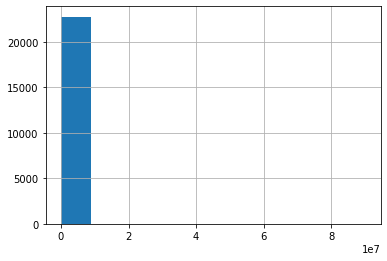

In [ ]:
df.Salary.hist()
plt.show()

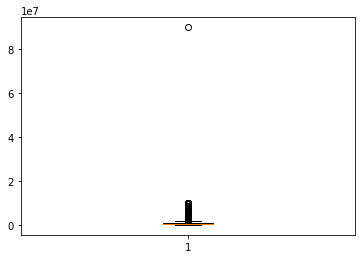

In [ ]:
plt.boxplot(df['Salary'])
plt.show()

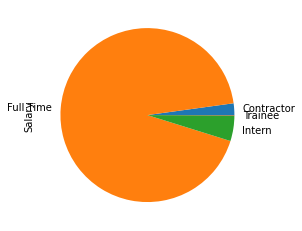

In [ ]:
df.groupby('Employment Status').Salary.sum().plot(kind='pie')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


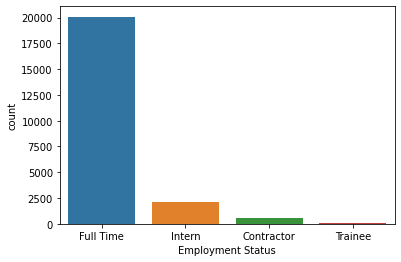

In [ ]:
sns.countplot(df['Employment Status'])
plt.show()

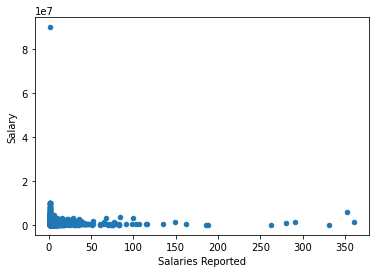

In [ ]:
df.plot(x='Salaries Reported',y='Salary',kind = 'scatter')
plt.show()

In [ ]:
df.select_dtypes(['float64' , 'int64']).corr()

,Rating,Salary,Salaries Reported
Rating,1.000000,0.025476,-0.011690
Salary,0.025476,1.000000,0.004481
Salaries Reported,-0.011690,0.004481,1.000000


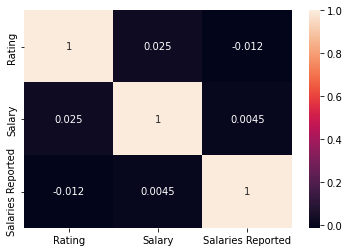

In [ ]:
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

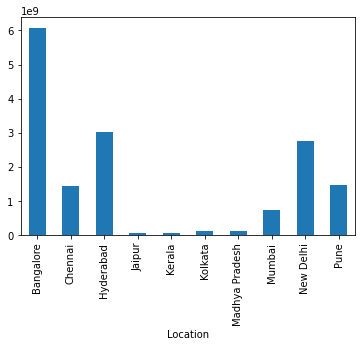

In [ ]:
df.groupby('Location').Salary.sum().plot(kind='bar')
plt.show()

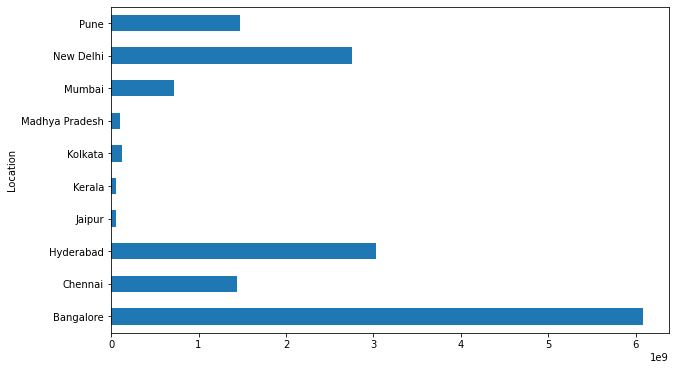

In [ ]:
df.groupby('Location').Salary.sum().plot(kind='barh')
plt.show()

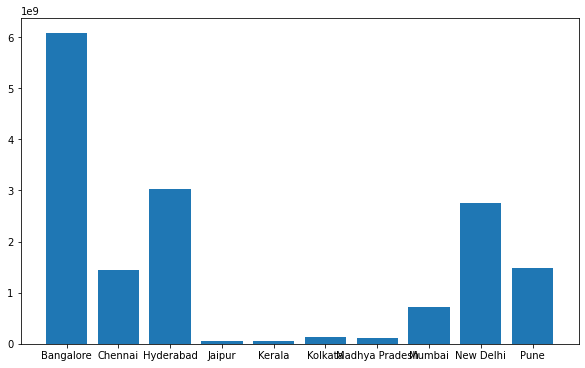

In [ ]:
summary=df.groupby('Location').Salary.sum()
plt.bar(x=summary.index , height=summary.values)
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

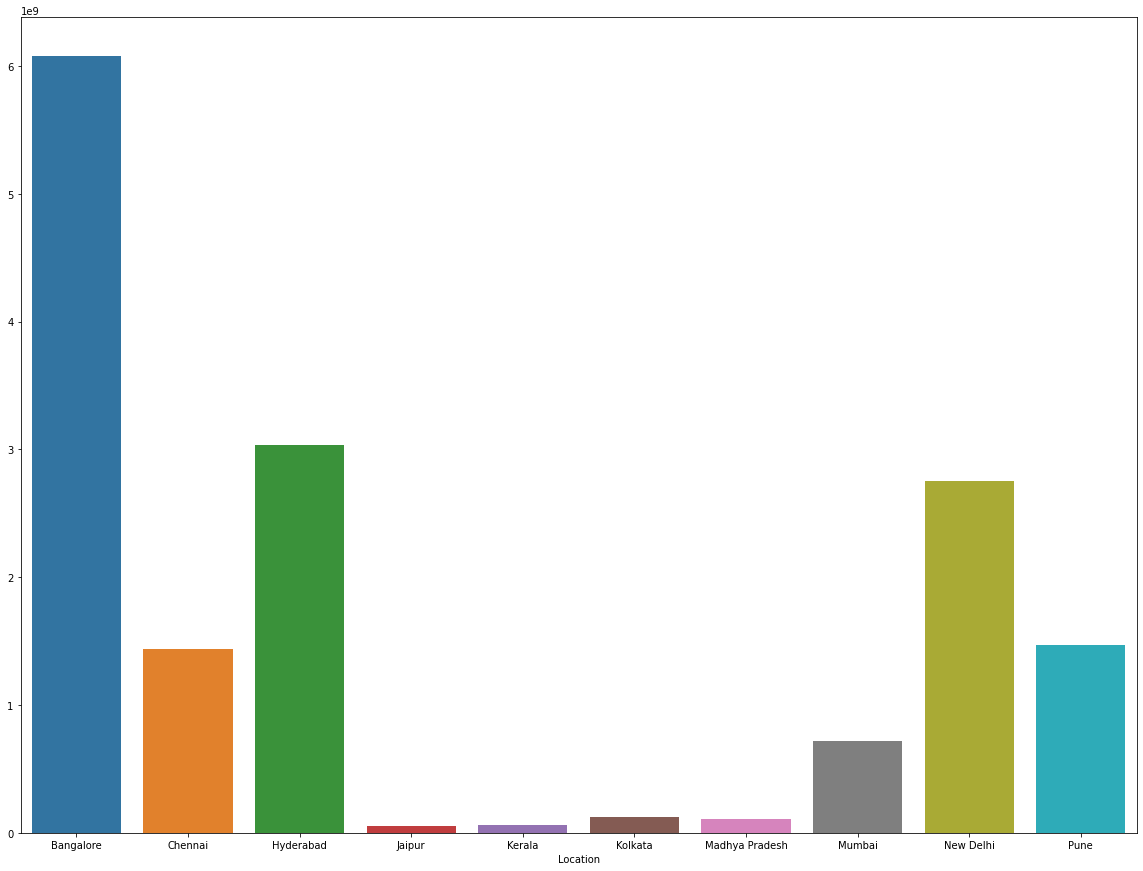

In [ ]:
summary=df.groupby('Location').Salary.sum()
sns.barplot(x=summary.index , y=summary.values)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

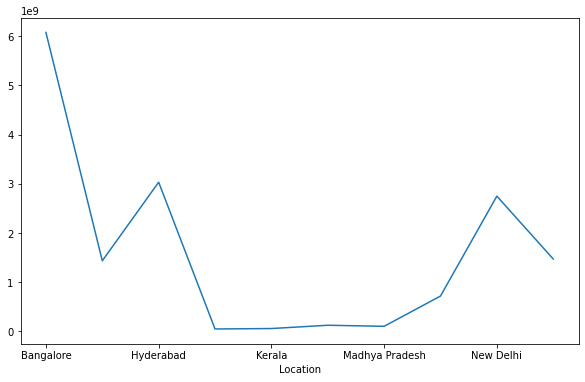

In [ ]:
df.groupby('Location').Salary.sum().plot(kind='line')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

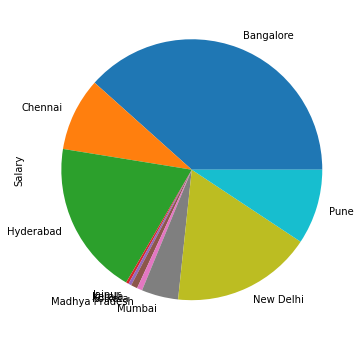

In [ ]:
df.groupby('Location').Salary.sum().plot(kind='pie')
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [ ]:
pd.crosstab(df.Location,df['Employment Status'])

Employment Status,Contractor,Full Time,Intern,Trainee
Location,,,,
Bangalore,248,7210,798,8
Chennai,41,2255,151,11
Hyderabad,142,4070,249,6
Jaipur,0,68,13,0
Kerala,1,101,6,0
Kolkata,1,141,35,1
Madhya Pradesh,0,125,29,1
Mumbai,15,666,68,0
New Delhi,62,3537,576,1


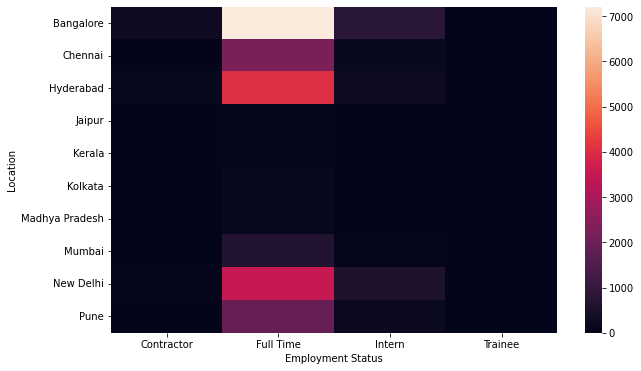

In [ ]:
tab_00 = pd.crosstab(df.Location,df['Employment Status'])
sns.heatmap(tab_00)
plt.show()

## Bibliografía


* (2022,Montenegro y Montenegro) Aprendizaje profundo. Diplomado de IA y AP. 
* BeginnersGuide. link :https://wiki.python.org/moin/BeginnersGuide/Programmers
* Uniwebsidad. link :https://uniwebsidad.com/libros/algoritmos-python